# Arquitecturas Fundacionales de CNN - LeNet-5 y AlexNet

**Objetivo:** Después de construir nuestra propia CNN básica, en este notebook exploraremos dos de las arquitecturas más influyentes en la historia de la visión por computador: LeNet-5 y AlexNet. Implementaremos versiones adaptadas de ambas para el dataset CIFAR-10, entenderemos sus componentes clave y compararemos su rendimiento.

### 1. Preparación del Entorno

Como siempre, empezamos importando las librerías necesarias y preparando nuestros datos. Los pasos son los mismos que en el notebook anterior.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print("Datos listos. Forma de x_train:", x_train.shape)

Datos listos. Forma de x_train: (50000, 32, 32, 3)


### 2. LeNet-5: La Pionera en Convoluciones

Desarrollada por Yann LeCun en 1998, LeNet-5 es considerada la "abuela" de las CNNs. Fue diseñada originalmente para reconocer dígitos manuscritos del dataset MNIST (imágenes en escala de grises de 28x28).

**Arquitectura Original:**
1.  **C1 (Convolucional):** 6 filtros de 5x5. Usa `tanh` como activación.
2.  **S2 (Subsampling/Pooling):** Capa de `AveragePooling` de 2x2.
3.  **C3 (Convolucional):** 16 filtros de 5x5.
4.  **S4 (Subsampling/Pooling):** Capa de `AveragePooling` de 2x2.
5.  **C5 (Convolucional/Densa):** 120 filtros de 5x5, que actúa como una capa totalmente conectada.
6.  **F6 (Densa):** 84 neuronas.
7.  **Salida:** 10 neuronas (para 10 dígitos).

![Arquitectura de LeNet-5](images/lenet5.png)

**Adaptación a CIFAR-10:**
- Usaremos imágenes de 32x32x3.
- Reemplazaremos la activación `tanh` por `ReLU`, que es el estándar moderno.
- Mantendremos la estructura de capas `Conv -> Pool -> Conv -> Pool -> Dense -> Dense`.

In [2]:
def build_lenet(input_shape=(32, 32, 3)):
    model = Sequential([
        # C1: Capa Convolucional
        Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'),
        # S2: Capa de Pooling
        AveragePooling2D(pool_size=(2, 2)),
        
        # C3: Capa Convolucional
        Conv2D(16, kernel_size=(5, 5), activation='relu'),
        # S4: Capa de Pooling
        AveragePooling2D(pool_size=(2, 2)),
        
        # Aplanar para las capas densas
        Flatten(),
        
        # F5: Capa Densa
        Dense(120, activation='relu'),
        # F6: Capa Densa
        Dense(84, activation='relu'),
        
        # Capa de Salida
        Dense(num_classes, activation='softmax')
    ], name="LeNet-5_Adapted")
    return model

lenet_model = build_lenet()
lenet_model.summary()

C:\Users\legion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "LeNet-5_Adapted"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 16, 16, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento y Evaluación de LeNet-5

In [3]:
lenet_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

print("\n--- Entrenando LeNet-5 ---")
history_lenet = lenet_model.fit(x_train, y_train_cat,
                                epochs=25,
                                batch_size=64,
                                validation_data=(x_test, y_test_cat))


--- Entrenando LeNet-5 ---
Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.3182 - loss: 1.8646 - val_accuracy: 0.4887 - val_loss: 1.4001
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5153 - loss: 1.3627 - val_accuracy: 0.5373 - val_loss: 1.2964
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5697 - loss: 1.2130 - val_accuracy: 0.5691 - val_loss: 1.2271
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6076 - loss: 1.1168 - val_accuracy: 0.5866 - val_loss: 1.1505
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6233 - loss: 1.0593 - val_accuracy: 0.6181 - val_loss: 1.0819
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6462 - loss: 0.9986 - val_accuracy: 0.6124 - val_loss: 1.1039
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6598 - loss: 0.9618 - val_accuracy: 0.6299 - val_loss: 1.0692
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6828 - los

### 3. AlexNet: La Revolución del Deep Learning

AlexNet, desarrollada por Alex Krizhevsky et al. en 2012, ganó la competencia ImageNet (ILSVRC) por un margen enorme, demostrando el poder de las CNNs profundas entrenadas en GPUs. Fue un punto de inflexión para el Deep Learning.

**Innovaciones Clave:**
- **Profundidad:** Era mucho más profunda que LeNet (5 capas convolucionales y 3 densas).
- **Activación ReLU:** Usó la función de activación ReLU, que entrenaba mucho más rápido que `tanh` o `sigmoid`.
- **Dropout:** Introdujo el uso de capas de `Dropout` para combatir el sobreajuste en las capas densas.
- **MaxPooling:** Popularizó el uso de `MaxPooling` en lugar de `AveragePooling`.

**Adaptación a CIFAR-10:**
La AlexNet original tomaba imágenes de 227x227. Adaptaremos la arquitectura para nuestras imágenes de 32x32, principalmente ajustando el tamaño del primer kernel y los strides.

In [4]:
def build_alexnet(input_shape=(32, 32, 3)):
    model = Sequential([
        # 1ra Capa Convolucional (adaptada)
        Conv2D(96, kernel_size=(5, 5), strides=(1,1), activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        
        # 2da Capa Convolucional
        Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        
        # 3ra, 4ta y 5ta Capa Convolucional
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'),
        Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
        
        # Aplanar para las capas densas
        Flatten(),
        
        # Capas densas con Dropout
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        
        # Capa de Salida
        Dense(num_classes, activation='softmax')
    ], name="AlexNet_Adapted")
    return model

alexnet_model = build_alexnet()
alexnet_model.summary()

Model: "AlexNet_Adapted"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 96)     │         7,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,323,146 (142.38 MB)

 Trainable params: 37,323,146 (142.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento y Evaluación de AlexNet
Nota: AlexNet es una red mucho más grande y su entrenamiento tomará considerablemente más tiempo.

In [5]:
alexnet_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

print("\n--- Entrenando AlexNet ---")
history_alexnet = alexnet_model.fit(x_train, y_train_cat,
                                  epochs=25, # AlexNet se beneficia de más épocas
                                  batch_size=64,
                                  validation_data=(x_test, y_test_cat))


--- Entrenando AlexNet ---
Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 479s 609ms/step - accuracy: 0.2456 - loss: 2.0259 - val_accuracy: 0.4804 - val_loss: 1.4297
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 524s 671ms/step - accuracy: 0.4778 - loss: 1.4176 - val_accuracy: 0.5176 - val_loss: 1.2987
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 675s 863ms/step - accuracy: 0.5573 - loss: 1.2343 - val_accuracy: 0.6026 - val_loss: 1.1255
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 3949s 5s/step - accuracy: 0.6090 - loss: 1.0979 - val_accuracy: 0.6255 - val_loss: 1.0876
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 423s 541ms/step - accuracy: 0.6564 - loss: 0.9787 - val_accuracy: 0.6329 - val_loss: 1.0543
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 421s 539ms/step - accuracy: 0.6830 - loss: 0.8927 - val_accuracy: 0.6694 - val_loss: 0.9501
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 415s 531ms/step - accuracy: 0.7136 - loss: 0.8166 - val_accuracy: 0.6773 - val_loss: 0.9539
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 409s 522ms

### 4. Comparación y Conclusiones

Finalmente, grafiquemos las curvas de aprendizaje de ambos modelos para comparar su rendimiento.

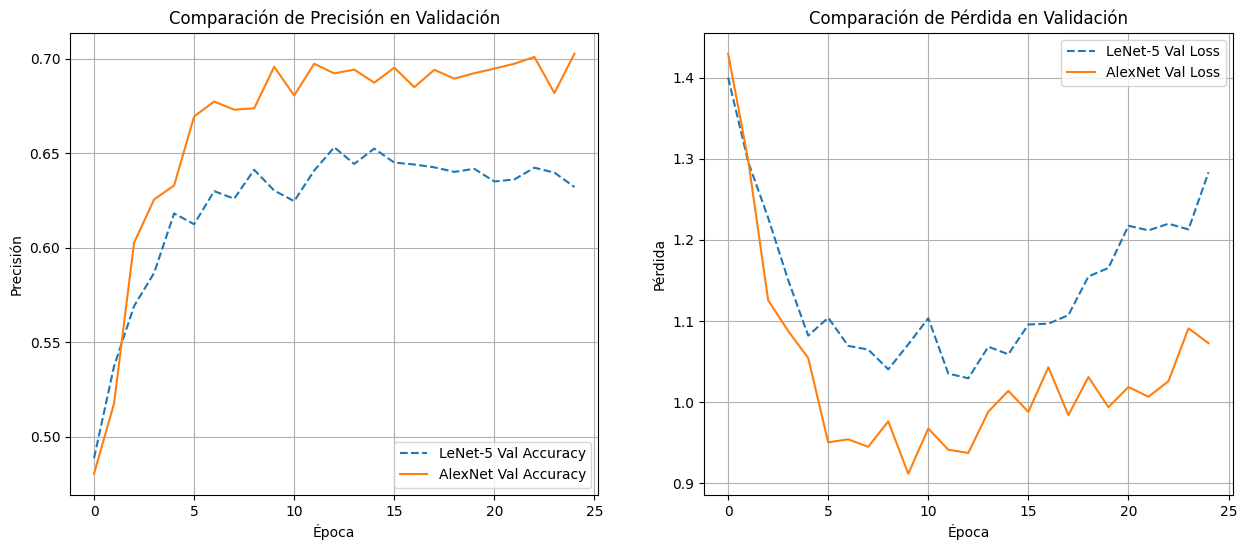

In [6]:
plt.figure(figsize=(15, 6))

# Gráfico de Precisión
plt.subplot(1, 2, 1)
plt.plot(history_lenet.history['val_accuracy'], label='LeNet-5 Val Accuracy', linestyle='--')
plt.plot(history_alexnet.history['val_accuracy'], label='AlexNet Val Accuracy', linestyle='-')
plt.title('Comparación de Precisión en Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfico de Pérdida
plt.subplot(1, 2, 2)
plt.plot(history_lenet.history['val_loss'], label='LeNet-5 Val Loss', linestyle='--')
plt.plot(history_alexnet.history['val_loss'], label='AlexNet Val Loss', linestyle='-')
plt.title('Comparación de Pérdida en Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.show()

**Análisis de Resultados:**

Deberíamos observar que AlexNet, a pesar de ser más lenta de entrenar, alcanza una precisión significativamente mayor que LeNet-5. Esto se debe a su mayor profundidad y capacidad para aprender características más complejas, junto con el uso de técnicas modernas como ReLU y Dropout.

**Conclusión:**
Hemos visto la evolución de las CNNs a través de dos de sus arquitecturas más importantes. LeNet-5 sentó las bases, y AlexNet demostró que hacer las redes más profundas y grandes, junto con algunas innovaciones clave, era el camino a seguir. Esto abrió la puerta a las arquitecturas aún más profundas que dominan hoy en día (VGG, ResNet) y a tareas más complejas como la detección de objetos, que veremos a continuación.